In [1]:
import pandas as pd

In [2]:
# データを読み込む
df = pd.read_csv(r'C:\Users\bougt\gastric_2023.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dead          715 non-null    int64  
 1   ry            715 non-null    int64  
 2   lap           715 non-null    int64  
 3   dm            715 non-null    int64  
 4   days          715 non-null    int64  
 5   date_ope      715 non-null    object 
 6   age           715 non-null    int64  
 7   sex           715 non-null    int64  
 8   height        715 non-null    float64
 9   weight        715 non-null    float64
 10  BMI           715 non-null    float64
 11  ASA           715 non-null    int64  
 12  emergency     715 non-null    int64  
 13  blood_out     715 non-null    int64  
 14  blood_in      715 non-null    int64  
 15  urine         715 non-null    int64  
 16  fluid         715 non-null    int64  
 17  multi         715 non-null    int64  
 18  re            715 non-null    

In [3]:
df['date_ope'].tail()

710     2018/8/20
711     2018/4/23
712      2019/3/8
713      2018/7/9
714    2018/12/14
Name: date_ope, dtype: object

In [8]:
from tableone import TableOne

data = df

# 変数リスト（調べたい変数の名前）
columns = ['age', 'sex', 'height', 'weight', 'BMI', 
           'ASA', 'emergency', 'tiva', 'block', 'multi', 're', 'ry', 
           'blood_out', 'blood_in', 'urine', 'fluid', 
           'time_thertre', 'time_anae', 'time_ope',
          ]

# カテゴリー変数リスト（カテゴリー変数の名前）
categorical = ['sex', 'ASA', 'emergency', 'tiva', 'block', 'multi', 're', 
              ]

# グループ化のための変数（比較したいグループがあれば）
groupby = 'ry'

# 非正規分布変数リスト（非正規分布の連続変数の名前）
nonnormal = [
            ]

# Table 1 の作成
table_one = TableOne(data, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal,
                     pval=True, overall = False, smd=True, htest_name=True)

# Table 1 の表示
print(table_one.tabulate)#(tablefmt="pipe"))

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function mean at 0x000001FAE9CC0D60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <function median at 0x000001FAE9DEF100> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_cont = pd.pivot_table(cont_data,
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\tableone\tableone.py:927: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To kee

<bound method TableOne.tabulate of                           Grouped by ry                                                                                             
                                Missing               0               1 P-Value                                       Test SMD (0,1)
n                                                   226             489                                                             
age, mean (SD)                        0     70.0 (10.4)     68.1 (10.6)   0.031                          Two Sample T-test    -0.173
sex, n (%)              0             0       87 (38.5)      126 (25.8)   0.001                                Chi-squared     0.275
                        1                    139 (61.5)      363 (74.2)                                                             
height, mean (SD)                     0    157.9 (10.8)     160.6 (8.6)   0.001                          Two Sample T-test     0.273
weight, mean (SD)                 

In [9]:
from scipy.stats import chi2_contingency

# 変数のリスト
variables = ['ry', 'lap', 'tiva', 'block']

# χ^2検定の結果を格納するための辞書
chi2_results = {}

# 各変数に対してχ^2検定を実行
for var in variables:
    # 死亡率の違いに関するχ^2検定
    dead_table = pd.crosstab(df[var], df['dead'])
    chi2_dead, p_dead, _, _ = chi2_contingency(dead_table)
    
    # 発症率の違いに関するχ^2検定
    dm_table = pd.crosstab(df[var], df['dm'])
    chi2_dm, p_dm, _, _ = chi2_contingency(dm_table)
    
    # 結果を辞書に格納
    chi2_results[var] = {'chi2_dead': chi2_dead, 'p_dead': p_dead, 'chi2_dm': chi2_dm, 'p_dm': p_dm}

chi2_results_df = pd.DataFrame(chi2_results).T
chi2_results_df

,chi2_dead,p_dead,chi2_dm,p_dm
ry,5.135973,0.023435,0.072568,0.787634
lap,8.360676,0.015293,0.078396,0.961560
tiva,0.128922,0.719552,0.000000,1.000000
block,4.296838,0.038183,0.921738,0.337019


死亡に関してblockとlapとryは関連する
糖尿病に関してはない

C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:444: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  warnings.warn(
C:\Users\bougt\anaconda3\envs\eda\Lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:444: DeprecationWarning: The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`
  warnings.warn(


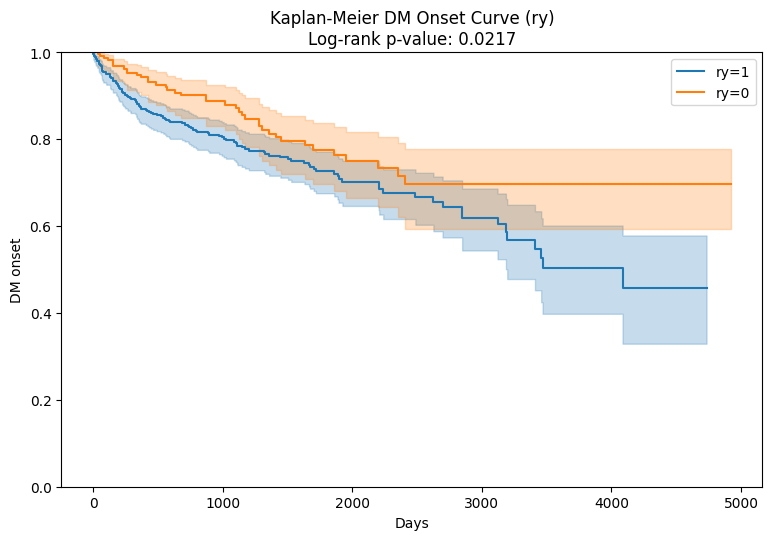

{'ry': 0.02173203692357078}


In [10]:
import matplotlib.pyplot as plt
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 変数のリスト
variables = ['ry']

# ログランク検定のp値を格納する辞書
logrank_p_values = {}

kmf = KaplanMeierFitter()

plt.figure(figsize=(15, 10))

# イベントの発生（糖尿病の発症）と打ち切り（死亡）を組み合わせる
event_observed = df['dm'] + df['dead']

# 各変数に対してカプランマイヤー曲線をプロット
for idx, var in enumerate(variables, 1):
    plt.subplot(2, 2, idx)
    
    T_groups = []
    E_groups = []
    labels = []
    
    for value in df[var].unique():
        mask = df[var] == value
        T_groups.append(df[mask]['days'])
        E_groups.append(event_observed[mask])
        labels.append(f'{var}={value}')
        
        kmf.fit(df[mask]['days'], event_observed=event_observed[mask], label=f'{var}={value}')
        kmf.plot()
        
    # ログランク検定
    logrank_result = logrank_test(T_groups[0], T_groups[1], event_observed_A=E_groups[0], event_observed_B=E_groups[1])
    logrank_p_values[var] = logrank_result.p_value
    
    plt.title(f'Kaplan-Meier DM Onset Curve ({var})\nLog-rank p-value: {logrank_result.p_value:.4f}')
    plt.ylabel('DM onset')
    plt.xlabel('Days')
    plt.ylim(1, 0)  # y軸の範囲を0から1に設定

    plt.legend()

plt.tight_layout()

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()

print(logrank_p_values)

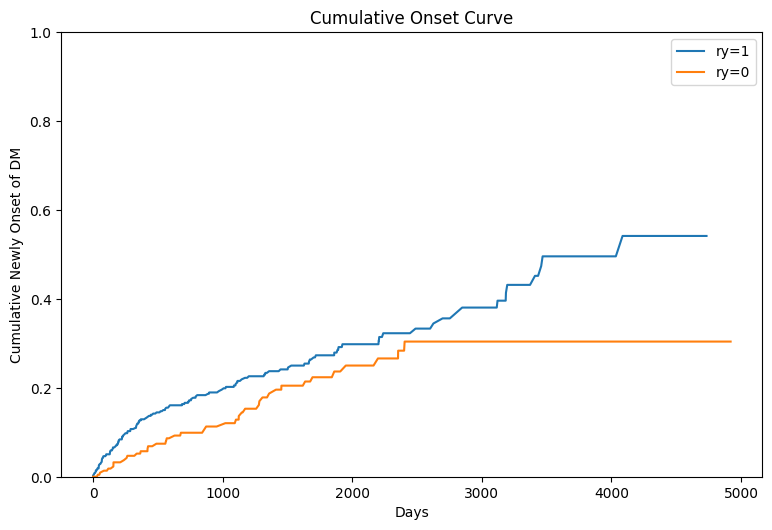

{'ry': 0.02173203692357078}


In [11]:
import matplotlib.pyplot as plt
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 変数のリスト
variables = ['ry']

# ログランク検定のp値を格納する辞書
logrank_p_values = {}

plt.figure(figsize=(15, 10))

# イベントの発生（糖尿病の発症）と打ち切り（死亡）を組み合わせる
event_observed = df['dm'] + df['dead']

# 各変数に対してカプランマイヤー曲線（累積発生率）をプロット
for idx, var in enumerate(variables, 1):
    plt.subplot(2, 2, idx)
    
    T_groups = []
    E_groups = []
    labels = []
    
    for value in df[var].unique():
        mask = df[var] == value
        T_groups.append(df[mask]['days'])
        E_groups.append(event_observed[mask])
        labels.append(f'{var}={value}')
        
        kmf.fit(df[mask]['days'], event_observed=event_observed[mask])
        
        # Calculate the cumulative incidence
        cumulative_incidence = 1 - kmf.survival_function_
        
        # Plot the cumulative incidence
        plt.plot(kmf.survival_function_.index, cumulative_incidence, label=f'{var}={value}')
        
    # ログランク検定
    logrank_result = logrank_test(T_groups[0], T_groups[1], event_observed_A=E_groups[0], event_observed_B=E_groups[1])
    logrank_p_values[var] = logrank_result.p_value
    
    plt.title(f'Cumulative Onset Curve')
    plt.ylabel('Cumulative Newly Onset of DM')
    plt.xlabel('Days')
    plt.ylim(0, 1)  # y軸の範囲を0から1に設定

    plt.legend()

plt.tight_layout()
plt.show()

print(logrank_p_values)

減量手術のバリエーションからの考察

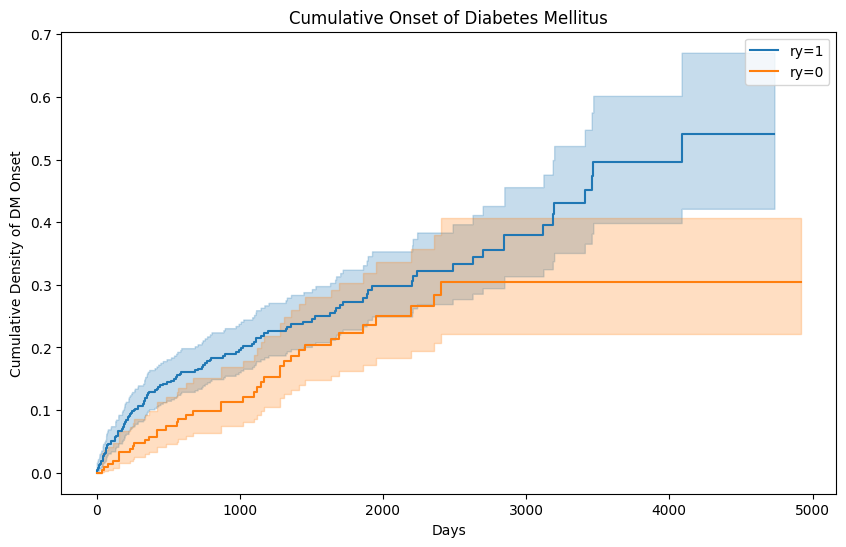

ValueError: could not convert string to float: '2005/8/22'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

# イベント（糖尿病の発症）と打ち切り（死亡）を組み合わせる
df['event_observed'] = df['dm'] + df['dead']

# カプランマイヤー曲線（累積発症率）をプロット
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# ryでグループ分けしてプロット
for group in df['ry'].unique():
    mask = df['ry'] == group
    kmf.fit(df[mask]['days'], event_observed=df[mask]['event_observed'], label=f'ry={group}')
    kmf.plot_cumulative_density()

plt.title('Cumulative Onset of Diabetes Mellitus')
plt.ylabel('Cumulative Density of DM Onset')
plt.xlabel('Days')
plt.legend()
plt.show()

# Cox比例ハザードモデルをフィット
cph = CoxPHFitter()
df['ry'] = df['ry'].astype('category')  # 'ry'をカテゴリカル変数に変換
cph.fit(df, 'days', event_col='event_observed')  # イベントは糖尿病の発症に設定

# Coxモデルの統計量を表示
print(cph.summary)